# Stochastic infectious pulse
https://github.com/alvason/stochastic-infectious-pulse

### Stochastic version for evolutionary insights

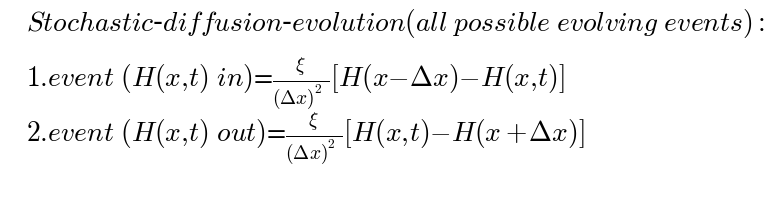

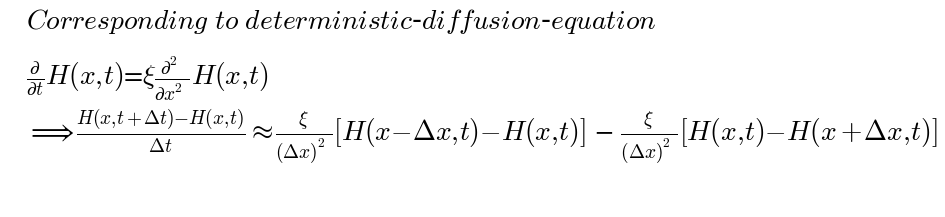

In [24]:
'''
author: Alvason Zhenhua Li
date:   07/07/2015
'''
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import time
import os
dir_path = '/Users/al/Desktop/GitHub/stochastic-infectious-pulse/figure'
file_name = 'stochastic-diffusion'

import alva_machinery_probability as alva

AlvaFontSize = 23
AlvaFigSize = (16, 8)
numberingFig = 0

# stochastic evolution
figure_name = '-stochastic-event'
file_suffix = '.png'
save_figure = os.path.join(dir_path, file_name + figure_name + file_suffix)
text_list = [r'$ Stochastic $-$ diffusion $-$ evolution(all \ possible \ evolving \ events): $'
              , r'$ 1. event \ (H(x, t) \ in) \equal \frac{\xi}{(\Delta{x})^2} [H(x-\Delta{x}) - H(x, t)] $'
              , r'$ 2. event \ (H(x, t) \ out) \equal \frac{\xi}{(\Delta{x})^2} [H(x, t) - H(x+\Delta{x})] $'
            ]
total_list = np.size(text_list)
numberingFig = numberingFig + 1
plt.figure(numberingFig, figsize=(total_list*2, total_list))
plt.axis('off')
for i in range(total_list):
    plt.text(0, (total_list - float(i))/total_list
             , text_list[i].replace('\\\n', '')
             , fontsize = 1.2*AlvaFontSize)
plt.savefig(save_figure, dpi = 100)
plt.show()

# relating to the deterministic diffusion equation
text_list = [r'$ Corresponding \ to \ deterministic $-$ diffusion $-$ equation $'
             , r'$ \frac{\partial{}}{\partial{t}}H(x, t) \equal \
                     \xi \frac{\partial{}^2}{\partial{x}^2}H(x, t) $'
             , r'$ \Longrightarrow \frac{H(x, t + \Delta{t}) - H(x, t)}{\Delta{t}} \approx \
                     \frac{\xi}{(\Delta{x})^2} [H(x-\Delta{x}, t) - H(x ,t)] \ \minus \ \
                     \frac{\xi}{(\Delta{x})^2} [H(x, t) - H(x+\Delta{x} ,t)] $'
            ]
total_list = np.size(text_list)
numberingFig = numberingFig + 1
plt.figure(numberingFig, figsize=(total_list*2, total_list))
plt.axis('off')
for i in range(total_list):
    plt.text(0, (total_list - float(i))/total_list
             , text_list[i].replace('\\\n', '')
             , fontsize = 1.2*AlvaFontSize)
plt.show()

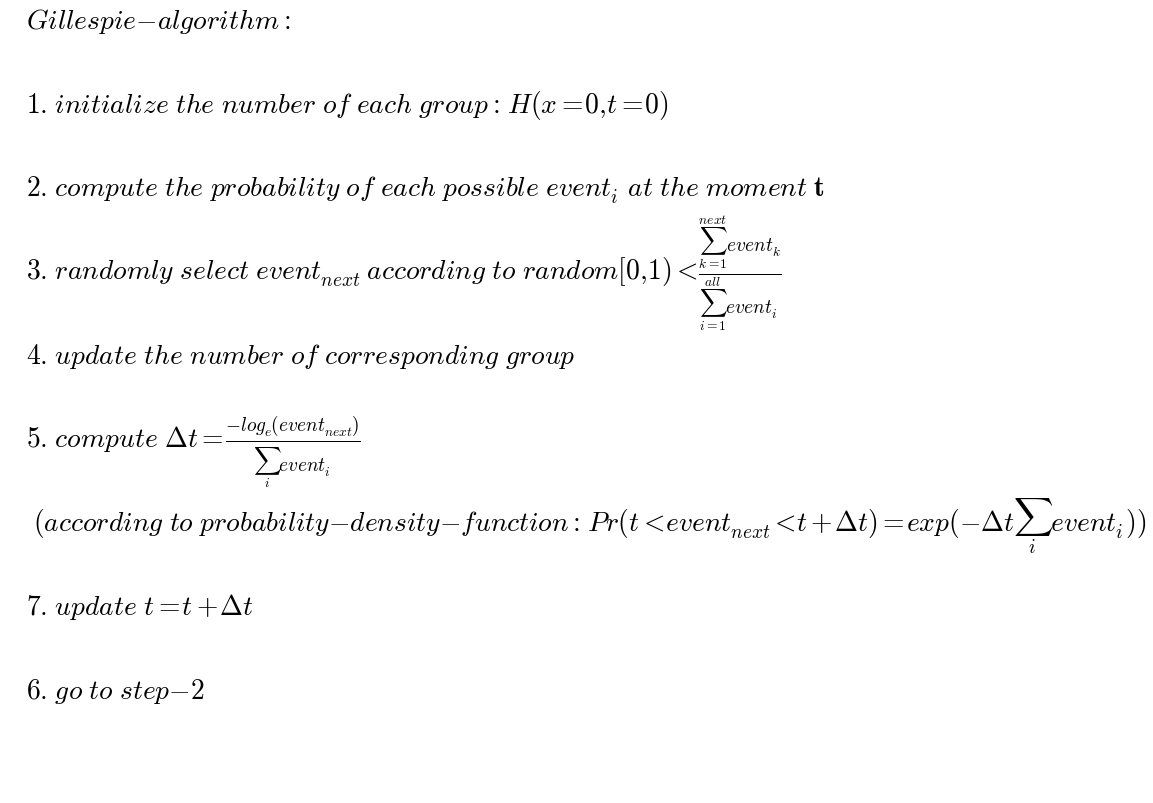

In [25]:
# algorithm for stochastic evolution
figure_name = '-Gillespie-algorithm'
file_suffix = '.png'
save_figure = os.path.join(dir_path, file_name + figure_name + file_suffix)
text_list = [r'$ Gillespie-algorithm: $'
             , r'$ 1. \ initialize \ the \ number \ of \ each \ group: \ H(x=0, t=0) $'
             , r'$ 2. \ compute \ the \ probability \ of \ each \ possible \ event_i \ at \ the \ moment \ \bf{t} $'
             , r'$ 3. \ randomly \ select \ event_{next} \
                   \ according \ to \ random{[0,1)} < \frac{\sum_{k=1}^{next}event_{k}}{\sum_{i=1}^{all} event_i} $'
             , r'$ 4. \ update \ the \ number \ of \ corresponding \ group $'
             , r'$ 5. \ compute \ \Delta t = \frac{-log_{e}(event_{next})}{\sum_{i}^{} event_i} $'
             , r'$ \ (according \ to \ probability-density-function: \ Pr(t < event_{next} < t+\Delta t) = \
                   exp(-\Delta t \sum_{i}^{} event_i )) $'
             , r'$ 7. \ update \ t = t + \Delta t $'
             , r'$ 6. \ go \ to \ step-2 $'
            ]
total_list = np.size(text_list)
numberingFig = numberingFig + 1
plt.figure(numberingFig, figsize=(total_list, total_list*1.5))
plt.axis('off')
for i in range(total_list):
    plt.text(0, (total_list - float(i))/total_list
             , text_list[i].replace('\\\n', '')
             , fontsize = 1.2*AlvaFontSize)
plt.savefig(save_figure, dpi = 100)
plt.show()

In [3]:
''' define stochasticDiffusion function '''
def stochasticDiffusion(minX, maxX, totalStep_X, minT, maxT, totalStep_T, initial_H, movingRate):
    # intialized
    gX = np.zeros([totalStep_X]) 
    gT = np.zeros([totalStep_T]) 
    gH = np.zeros([totalStep_X, totalStep_T]) 
    xn = int(0)
    tn = int(0)
    gX[xn] = minX
    gT[tn] = minT
    gH[xn, tn] = initial_H
    # all possible events
    event_Hin = movingRate*(gH[xn-1, tn] - gH[xn, tn])
    event_Hout = movingRate*(gH[xn, tn] - gH[xn+1, tn])
    # configuration table
    eventRate_updateNumH = np.array([[event_Hin, +1]
                                   , [event_Hout, -1]
                                    ])
    ###
    while (gT[tn] < maxT):       
        # randomly choose event
        if np.random.random() < (eventRate_updateNumSIR[0:1, 0].sum() / eventRate_updateNumSIR[:, 0].sum()):
            k = 0
        elif np.random.random() < (eventRate_updateNumSIR[0:2, 0].sum() / eventRate_updateNumSIR[:, 0].sum()):
            k = 1
        elif np.random.random() < (eventRate_updateNumSIR[0:3, 0].sum() / eventRate_updateNumSIR[:, 0].sum()):
            k = 2
        elif np.random.random() < (eventRate_updateNumSIR[0:4, 0].sum() / eventRate_updateNumSIR[:, 0].sum()):
            k = 3
        elif np.random.random() < (eventRate_updateNumSIR[0:5, 0].sum() / eventRate_updateNumSIR[:, 0].sum()):
            k = 4
        else:
            k = 5
        # update number of section
        gS[j] = gS[j] + eventRate_updateNumSIR[k, 1]
        gI[j] = gI[j] + eventRate_updateNumSIR[k, 2]
        gR[j] = gR[j] + eventRate_updateNumSIR[k, 3]
        # update event_rate
        event_SIRin = inOutRate*(gS[j] + gI[j] + gR[j])
        event_Sout = inOutRate*gS[j]
        event_Iout = inOutRate*gI[j]
        event_Rout = inOutRate*gR[j]
        event_SI = infecRate*gS[j]*gI[j] / (gS[j] + gI[j] + gR[j])
        event_IR = recovRate*gI[j]
        eventRate_updateNumSIR = np.array([[event_SIRin, 1, 0, 0]
                                         , [event_Sout, -1, 0, 0]
                                         , [event_Iout, 0, -1, 0]
                                         , [event_Rout, 0, 0, -1]
                                         , [event_SI, -1, +1, 0]
                                         , [event_IR, 0, -1, +1]])  
        # next step is based on current step
        dt = -np.log(np.random.random()) / eventRate_updateNumSIR[:, 0].sum()
        gT[j + 1] = gT[j] + dt 
        gS[j + 1] = gS[j]
        gI[j + 1] = gI[j]
        gR[j + 1] = gR[j]
        j = j + 1
    # set the value of remaining steps = value of the last step (for ending)
    gT[j:] = gT[j]
    gS[j:] = gS[j]
    gI[j:] = gI[j]
    gR[j:] = gR[j]
    ###
    return(gT, gS, gI, gR)

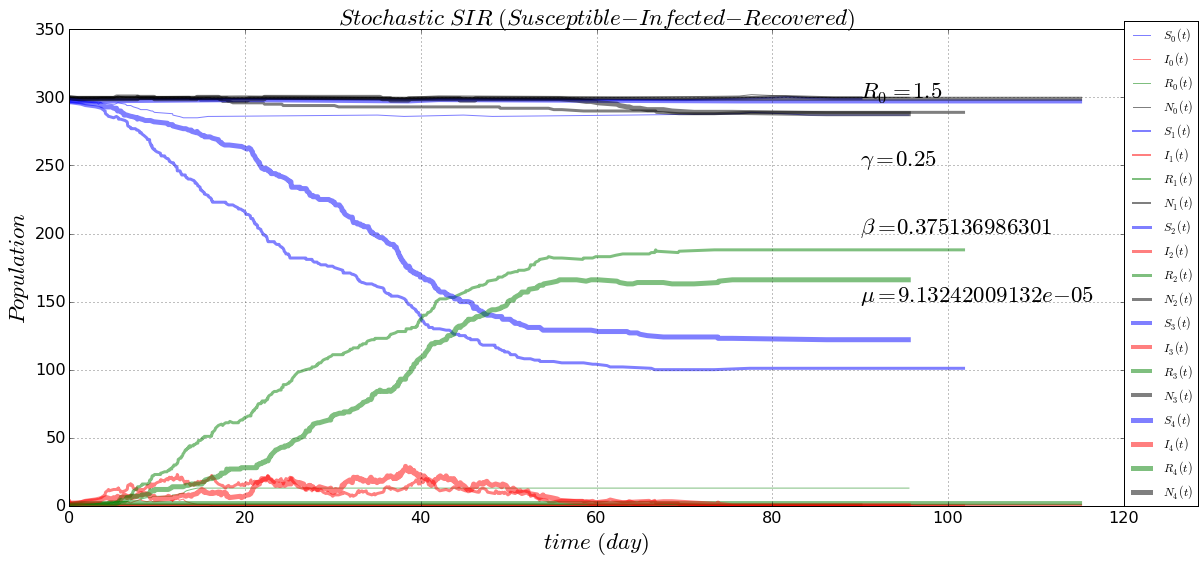

In [4]:
''' starting from one infected '''
# setting parameter
timeUnit = 'day'
if timeUnit == 'day':
    day = 1
    year = 365 
elif timeUnit == 'year':
    year = 1
    day = float(1)/365 
    
total_SIR = 300
initial_I = 1
initial_S = total_SIR - initial_I
initial_R = total_SIR - initial_S - initial_I
# set parameter
reprodNum = float(1.5) # basic reproductive number R0: one infected person will transmit to 1.8 person 
recovRate = float(1)/(4*day) # 4 days per period ==> rate/year = 365/4
inOutRate = float(1)/(30*year) # birth rate per year
infecRate = reprodNum*(recovRate + inOutRate)/1 # per year, per person, per total-population

# initial boundary condition
minT = float(0*day)
maxT = float(90*day)

total_step = int(maxT*total_SIR)
# stochastic evolution way
total_way = int(5)
gTT = np.zeros([total_way, total_step]) 
gSS = np.zeros([total_way, total_step]) 
gII = np.zeros([total_way, total_step]) 
gRR = np.zeros([total_way, total_step]) 

for i in range(total_way):
    aaa = stochasticSIR(total_step, minT, maxT, initial_S, initial_I, initial_R
                        , reprodNum, recovRate, inOutRate, infecRate)
    gTT[i] = aaa[0]
    gSS[i] = aaa[1]
    gII[i] = aaa[2]
    gRR[i] = aaa[3]

# plotting
figure_name = '-sir'
file_suffix = '.png'
save_figure = os.path.join(dir_path, file_name + figure_name + file_suffix)

numberingFig = numberingFig + 1
figure = plt.figure(numberingFig, figsize = AlvaFigSize)
for i in range(total_way):
    plt.plot(gTT[i], gSS[i], label = r'$ S_{:}(t) $'.format(i), linewidth = (1 + i)
             , color = 'blue', alpha = float(0.5 + i/total_way))
    plt.plot(gTT[i], gII[i], label = r'$ I_{:}(t) $'.format(i), linewidth = (1 + i)
             , color = 'red', alpha = float(0.5 + i/total_way))
    plt.plot(gTT[i], gRR[i], label = r'$ R_{:}(t) $'.format(i), linewidth = (1 + i)
             , color = 'green', alpha = float(0.5 + i/total_way))
    plt.plot(gTT[i], (gSS[i] + gII[i] + gRR[i]), label = r'$ N_{:}(t) $'.format(i)
             , linewidth = (1 + i), color = 'black', alpha = float(0.5 + i/total_way))    
plt.grid(True)
plt.title(r'$ Stochastic \ SIR \ (Susceptible-Infected-Recovered) $', fontsize = AlvaFontSize)
plt.xlabel(r'$ time \ ({:})$'.format(timeUnit), fontsize = AlvaFontSize)
plt.ylabel(r'$ Population $', fontsize = AlvaFontSize)
plt.legend(loc = (1,0))
plt.text(maxT, total_SIR*6.0/6, r'$ R_0 = {:} $'.format(reprodNum), fontsize = AlvaFontSize)
plt.text(maxT, total_SIR*5.0/6, r'$ \gamma = {:} $'.format(recovRate), fontsize = AlvaFontSize)
plt.text(maxT, total_SIR*4.0/6, r'$ \beta = {:} $'.format(infecRate), fontsize = AlvaFontSize)
plt.text(maxT, total_SIR*3.0/6, r'$ \mu = {:} $'.format(inOutRate), fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.7)
plt.yticks(fontsize = AlvaFontSize*0.7) 
figure.tight_layout()
plt.savefig(save_figure, dpi = 100, bbox_inches='tight')
plt.show()